In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


DATA PREREOCESSING

In [ ]:
import os

# Path to the adenocarcinoma image folder
data_dir = '/content/drive/MyDrive/split data'

# Get only image files
image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Full paths to the images
image_paths = [os.path.join(data_dir, f) for f in image_files]

# Print them
for path in image_paths:
    print(path)


/content/drive/MyDrive/split data/0002.jpg
/content/drive/MyDrive/split data/0001.jpg
/content/drive/MyDrive/split data/0017.jpg
/content/drive/MyDrive/split data/0006.jpg
/content/drive/MyDrive/split data/0018.jpg
/content/drive/MyDrive/split data/0005.jpg
/content/drive/MyDrive/split data/0013.jpg
/content/drive/MyDrive/split data/0009.jpg
/content/drive/MyDrive/split data/0007.jpg
/content/drive/MyDrive/split data/0011.jpg
/content/drive/MyDrive/split data/0003.jpg
/content/drive/MyDrive/split data/0012.jpg
/content/drive/MyDrive/split data/0004.jpg
/content/drive/MyDrive/split data/0008.jpg
/content/drive/MyDrive/split data/0014.jpg
/content/drive/MyDrive/split data/0010.jpg
/content/drive/MyDrive/split data/0016.jpg
/content/drive/MyDrive/split data/0015.jpg
/content/drive/MyDrive/split data/0027.jpg
/content/drive/MyDrive/split data/0031.jpg
/content/drive/MyDrive/split data/0034.jpg
/content/drive/MyDrive/split data/0026.jpg
/content/drive/MyDrive/split data/0023.jpg
/content/dr

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
import os

data_dir = '/content/drive/MyDrive/split data'

for fold in os.listdir(data_dir):
    foldpath = os.path.join(data_dir, fold)

    #  Only enter if it's a directory
    if os.path.isdir(foldpath):
        flist = os.listdir(foldpath)

        for file in flist:
            print("Found image:", os.path.join(foldpath, file))




Found image: /content/drive/MyDrive/split data/adenocarcinoma/1885.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1883.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1884.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1887.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1897.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1898.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1901.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1899.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1891.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1889.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1892.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1893.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1900.jpg
Found image: /content/drive/MyDrive/split data/adenocarcinoma/1890.jpg
Found 

In [ ]:
image_paths = []
labels = []

for fold in os.listdir(data_dir):
    foldpath = os.path.join(data_dir, fold)
    if os.path.isdir(foldpath):
        for file in os.listdir(foldpath):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(foldpath, file))
                labels.append(fold)

df = pd.DataFrame({'image_path': image_paths, 'labels': labels})
print(df.head())


                                          image_path          labels
0  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
1  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
3  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
4  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma


In [ ]:
print(df)

                                             image_path          labels
0     /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
1     /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2     /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
3     /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
4     /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
...                                                 ...             ...
2775  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2776  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2777  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2778  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma
2779  /content/drive/MyDrive/split data/adenocarcino...  adenocarcinoma

[2780 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample DataFrame: Replace with your actual DataFrame
# It should contain a column for image paths and a column for labels
df = pd.DataFrame({'image_path': image_paths, 'labels': labels})

# First split: train (70%) and temp (30%)
# Change 'label' to 'labels' to match the actual column name in your DataFrame
train_df, temp_df = train_test_split(
    df, test_size=0.3, stratify=df['labels'], random_state=42)

# Second split: validation (15%) and test (15%) from the temp set
# Change 'label' to 'labels' here as well
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['labels'], random_state=42)

# Confirm split sizes
print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

# Optional: Reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

Train size: 1946
Validation size: 417
Test size: 417


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set your save path
# save_path should be a local path within your Google Drive
save_path = "/content/drive/MyDrive/MyFolder"  # Replace 'MyFolder' with your desired folder name

# Create the directory if it doesn't exist
import os
os.makedirs(save_path, exist_ok=True)

# Save CSVs to Drive
# Use the save_path variable to construct the full file paths
train_df.to_csv(os.path.join(save_path, "train_data.csv"), index=False)
val_df.to_csv(os.path.join(save_path, "val_data.csv"), index=False)
test_df.to_csv(os.path.join(save_path, "test_data.csv"), index=False)

print("✅ Saved train, val, and test CSVs to Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved train, val, and test CSVs to Google Drive.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize with basic augmentation (optional)
datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.0  # set to 0 if already split
)


In [ ]:
# Train generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='labels',
    target_size=(224, 224),  # or any size suitable for your model
    batch_size=32,
    class_mode='raw',  # or 'binary' for 2 classes
    shuffle=True
)

# Validation generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    shuffle=False
)

# Test generator (optional)
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    shuffle=False
)


Found 1946 validated image filenames.
Found 417 validated image filenames.
Found 417 validated image filenames.


In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

NameError: name 'train_gen' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')
])


NameError: name 'train_gen' is not defined

# ***model structure ***

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_gen.class_indices), activation='softmax')  # fixed
])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
val_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1946 validated image filenames belonging to 1 classes.
Found 417 validated image filenames belonging to 1 classes.


In [ ]:
# ... (your existing model definition code) ...

# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])  # You can add other metrics like 'precision', 'recall', etc.

# Now you can call model.fit()
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 684s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - a

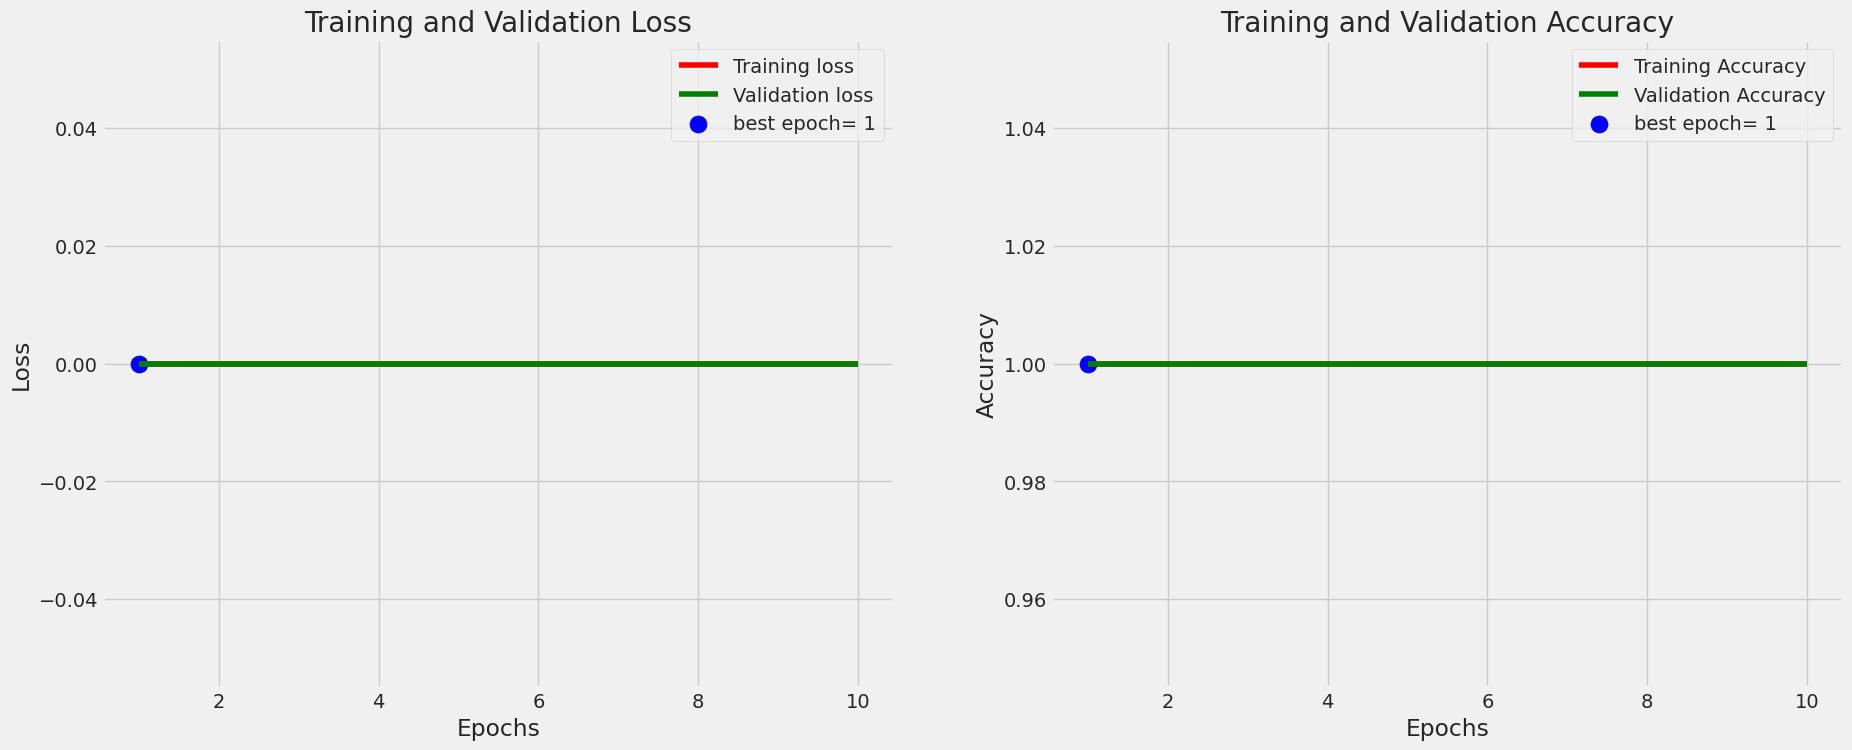

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


**EVALUVATE THE MODEL**

In [ ]:
# 1. Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # or 'categorical_crossentropy'
    metrics=['accuracy']
)

# 2. Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=10) # Changed valid_gen to val_gen

# 3. Evaluate performance
train_score = model.evaluate(train_gen, verbose=1)
valid_score = model.evaluate(val_gen, verbose=1)  # Changed valid_gen to val_gen

# Convert the 'labels' column in test_df to numerical type
test_df['labels'] = pd.factorize(test_df['labels'])[0]

# Re-create the test generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='labels',
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',  # Or 'categorical' if you have one-hot encoded labels
    shuffle=False
)


test_score = model.evaluate(test_generator, verbose=1) # Changed test_gen to test_generator

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - ac

**PREDICT THE MODEL**

In [ ]:
preds = model.predict(test_generator)  # Use model.predict instead of model.predict_generator
y_pred = np.argmax(preds, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 749ms/step


In [ ]:
y_true = test_generator.labels        # For DataFrameIterator
y_pred = np.argmax(preds, axis=1)     # Your model predictions


**CONFUSION MATRIX **

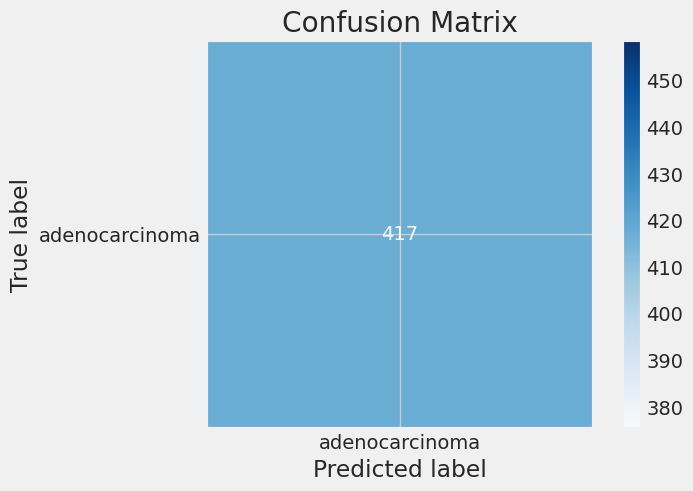

                precision    recall  f1-score   support

adenocarcinoma       1.00      1.00      1.00       417

      accuracy                           1.00       417
     macro avg       1.00      1.00      1.00       417
  weighted avg       1.00      1.00      1.00       417



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get class names
class_names = list(train_gen.class_indices.keys())


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))
